In [1]:
#Multiclass situation with Mutually Exclusive Classes --> Softmax Function
#1 Output note per class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Cleaned Data.csv', index_col=[0])

In [3]:
df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Signal
2,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0,1,0,0,0,0,0,0,0,Sell
5,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0,1,0,0,0,0,0,0,0,Buy
15,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,0.000000e+00,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,...,0,1,0,0,0,0,0,0,0,Buy
16,1.972400e+10,0.0083,1.304100e+10,6.683000e+09,0.000000e+00,3.709000e+09,4.162000e+09,2.521000e+09,2.840000e+08,2.382000e+09,...,0,1,0,0,0,0,0,0,0,Buy
17,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.220000e+08,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,...,0,1,0,0,0,0,0,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22070,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.572500e+07,5.269000e+06,2.099400e+07,-2.099400e+07,0.000000e+00,-2.113800e+07,...,0,0,0,0,1,0,0,0,0,Buy
22073,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0,0,0,0,0,0,1,0,0,Sell
22075,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0,0,0,0,0,0,0,0,0,Sell
22076,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0,0,0,0,0,1,0,0,0,Sell


In [4]:
X = df.drop('Signal', axis=1)
y = pd.get_dummies(df['Signal'])

In [5]:
y.head(3)

,Buy,Hold,Sell
2,0,0,1
5,1,0,0
15,1,0,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

#Scaler wird nur auf unser Trainingset skaliert (ohne Test Werte)
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))


model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(x=X_train, y=y_train, epochs=100)

Epoch 1/100
254/254 [==============================] - 1s 864us/step - loss: 0.9614 - accuracy: 0.4436
Epoch 2/100
254/254 [==============================] - 0s 854us/step - loss: 0.8826 - accuracy: 0.5281
Epoch 3/100
254/254 [==============================] - 0s 854us/step - loss: 0.8715 - accuracy: 0.5417
Epoch 4/100
254/254 [==============================] - 0s 854us/step - loss: 0.8705 - accuracy: 0.5371
Epoch 5/100
254/254 [==============================] - 0s 854us/step - loss: 0.8729 - accuracy: 0.5353
Epoch 6/100
254/254 [==============================] - 0s 792us/step - loss: 0.8686 - accuracy: 0.5345
Epoch 7/100
254/254 [==============================] - 0s 854us/step - loss: 0.8675 - accuracy: 0.5412
Epoch 8/100
254/254 [==============================] - 0s 818us/step - loss: 0.8634 - accuracy: 0.5413
Epoch 9/100
254/254 [==============================] - 0s 854us/step - loss: 0.8656 - accuracy: 0.5375
Epoch 10/100
254/254 [==============================] - 0s 916us/step - l

254/254 [==============================] - 0s 793us/step - loss: 0.8530 - accuracy: 0.5653
Epoch 80/100
254/254 [==============================] - 0s 854us/step - loss: 0.8466 - accuracy: 0.5757
Epoch 81/100
254/254 [==============================] - 0s 792us/step - loss: 0.8532 - accuracy: 0.5667
Epoch 82/100
254/254 [==============================] - 0s 793us/step - loss: 0.8472 - accuracy: 0.5713
Epoch 83/100
254/254 [==============================] - 0s 792us/step - loss: 0.8437 - accuracy: 0.5630
Epoch 84/100
254/254 [==============================] - 0s 793us/step - loss: 0.8480 - accuracy: 0.5543
Epoch 85/100
254/254 [==============================] - 0s 793us/step - loss: 0.8477 - accuracy: 0.5679
Epoch 86/100
254/254 [==============================] - 0s 793us/step - loss: 0.8499 - accuracy: 0.5731
Epoch 87/100
254/254 [==============================] - 0s 793us/step - loss: 0.8499 - accuracy: 0.5707
Epoch 88/100
254/254 [==============================] - 0s 793us/step - loss:

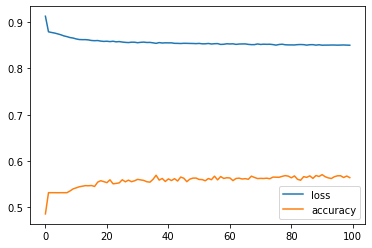

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [77]:
model.evaluate(X_test,y_test,verbose=0)

[0.8859031796455383, 0.5210132598876953]

In [78]:
model.evaluate(X_train,y_train,verbose=0)

[0.8625465631484985, 0.5433682799339294]